In [1]:
import os 
os.chdir('modules')
import forecaster as fc

In [2]:
# Loading data
data = fc.retrieve_data()

In [3]:
# Params for tuner
params = {
    'changepoint_prior_scale':[0.01,0.1,0.25,0.5],
    'seasonality_prior_scale':[0.01,0.1,0.5,1.0,5.0,10.0],
    'changepoint_range':[0.8,0.95]
}

In [4]:
# Getting the best parameters for prophet.
best = fc.hyper_tuner(data, params)

  0%|          | 0/48 [00:00<?, ?it/s]

In [24]:
# Printing out the best param map.
best

{'changepoint_prior_scale': 0.1,
 'seasonality_prior_scale': 0.01,
 'changepoint_range': 0.8}

In [22]:
# Fitting the data and retrieving the forecast and model.
f, m = fc.fit_predict_model(data, *best.values())

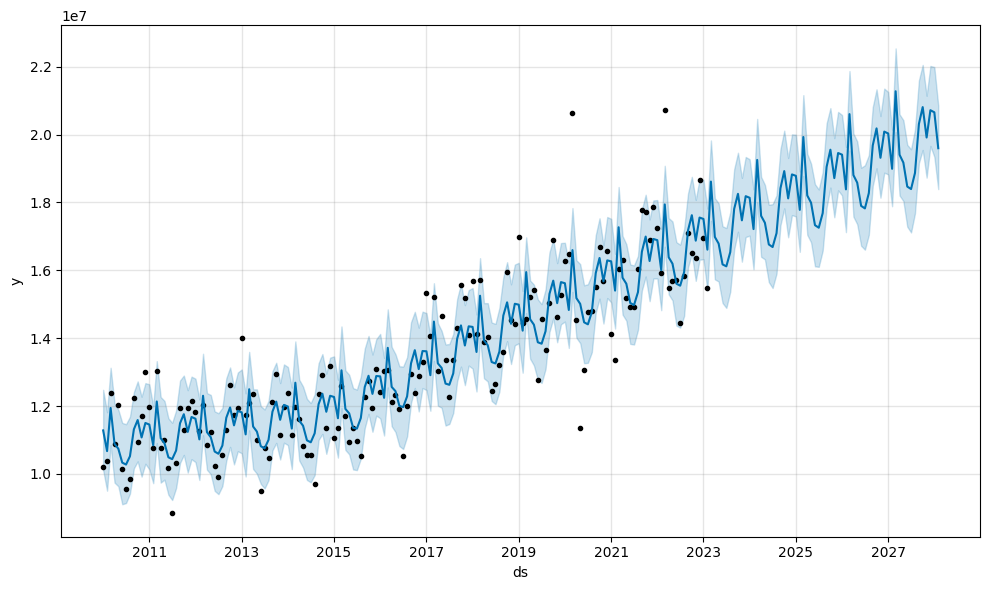

In [25]:
# Plotting the forecast.
fc.plot_prediction(m, f)

In [26]:
# Evaluating the model
fc.evaluate_model(m)

MAPE: 6.158%
MDAPE: 5.047%
SMAPE: 6.029%


In [27]:
# marking the anomalies in data
an = fc.detect_anomalies(f)

In [30]:
# Cleaning the dataframe from the anomalous data.
clean = fc.remove_anomalies(data, an)

In [33]:
best2 = fc.hyper_tuner(clean, params)

  0%|          | 0/48 [00:00<?, ?it/s]

In [34]:
best2

{'changepoint_prior_scale': 0.1,
 'seasonality_prior_scale': 0.1,
 'changepoint_range': 0.8}

In [35]:
f2, m2 = fc.fit_predict_model(clean, *best2.values())

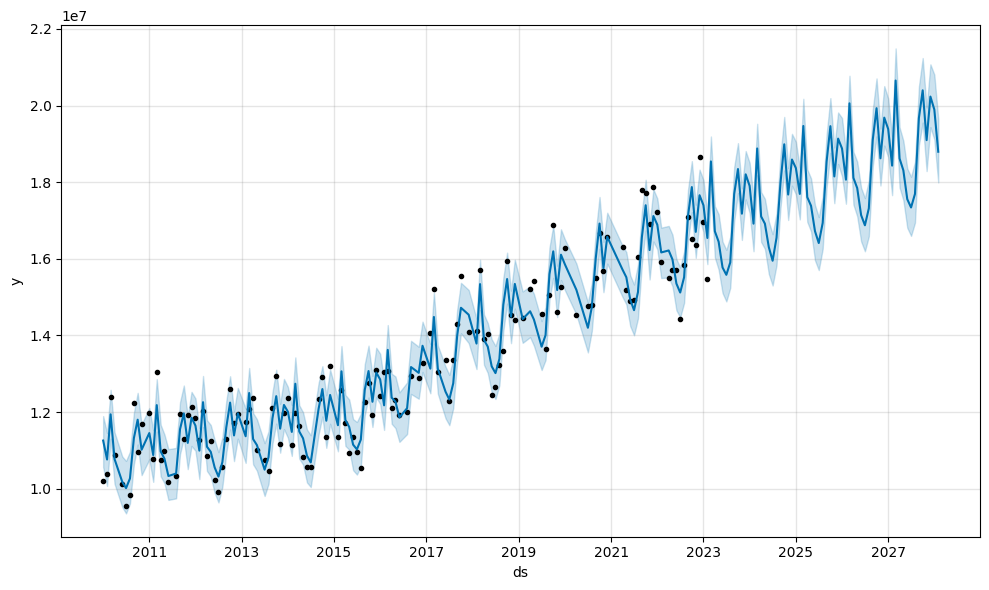

In [37]:
fc.plot_prediction(m2, f2)

In [38]:
fc.evaluate_model(m2)

MAPE: 4.150%
MDAPE: 3.307%
SMAPE: 4.145%
